In [1]:
import torch
import numpy as np
import os
from torch.utils.data import Dataset, DataLoader, random_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import make_classification
import collections
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt

In [9]:
file = "dataset\\YSYW_seq\\ECG\\processed_tr03-0005.npy"
data = np.load(file, allow_pickle=True).item()
sig = data["sig"]
sig.shape

(100, 6000)

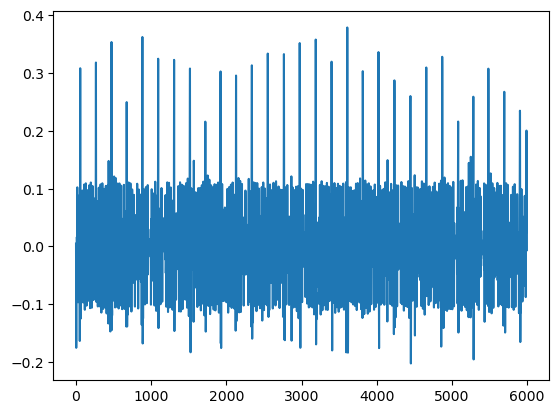

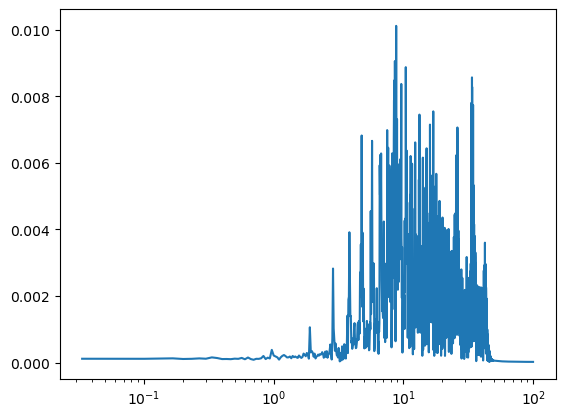

In [17]:
sig_frame = sig[1]
plt.plot(sig_frame)
plt.show()
### FFT: tの関数をfの関数にする ###
N = len(sig_frame)
dt = 0.005
y_fft = np.fft.fft(sig_frame) # 離散フーリエ変換
freq = np.fft.fftfreq(N, d=dt) # 周波数を割り当てる（※後述）
Amp = abs(y_fft/(N/2)) # 音の大きさ（振幅の大きさ）

plt.plot(freq[1:int(N/2)], Amp[1:int(N/2)]) # A-f グラフのプロット
plt.xscale("log") # 横軸を対数軸にセット
plt.show()

In [1]:
from scipy import signal
import numpy as np
#スペクトログラム分析の実施
fs = 200
f, t, Sxx = signal.spectrogram(sig_frame, fs)

#図の描画
plt.pcolormesh(t, f, 10*np.log(Sxx)) #intensityを修正
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
cbar = plt.colorbar() #カラーバー表示のため追加
cbar.ax.set_ylabel("Intensity [dB]") #カラーバーの名称表示のため追加
plt.show()

NameError: name 'x' is not defined